# Week 6 - Bivariate Analysis, part 2

# 1. Lesson: no lesson this week

# 2. Weekly graph question

Suppose you wanted to show the nitrate and phosphate level in a water sample.  What are the advantages and disadvantages of showing this as an area plot, as opposed to two separate line graphs?  How would you adjust the graphs shown to improve the presentation?

RESPONSE : Area_Plot Advantages: 1) visually appealing; quickly show total quantity/difference in levels
                                 2) stacked area plot shows cumulative levels (if looking at total nutrient concentration)
                                 3) combines two variables into a single graph
           Area_Plot Disadvantages: 1) harder to compare stacked variables; top line would represent sum instead of        individual value
                                    2) visually cluttered if shaded regions overlap
    2_Line_Graphs Advantages: 1) visually clearer trends; easier to compare nutrient changes over time
                              2) precise values with appropriate number of axes (shared or separated)
                              3) easily customizable
    2_Line_Graphs Disadvantages: 1) two separate graphs takes up more space; two graphs to analyze
                                 2) difficult to quickly see total nutrient load

RESPONSE : Area_Plot Adjustments - use distinct colors; add labels directly on plot lines
           2_Line_Graphs Adjustments - align x-axes perfectly for easier comparison; consider sharing y-axis if y-scales are similar; add annotations to highlight key moments in the data

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd

C:\Users\micha\AppData\Local\Temp\ipykernel_4716\2149468501.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')


Text(0, 0.5, 'Nitrate level (% of eutrophic value)')

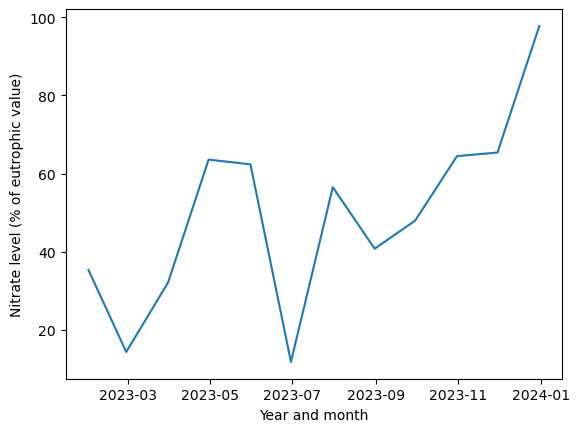

In [3]:
numdates = 12
np.random.seed(0)
time_series = 100 * (np.random.normal(size = numdates) / 5 + np.arange(numdates) / 16)
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')
ax = sns.lineplot(x = datearray, y = time_series)
ax.set_xlabel("Year and month")
ax.set_ylabel("Nitrate level (% of eutrophic value)")

C:\Users\micha\AppData\Local\Temp\ipykernel_4716\1726504607.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')


Text(0, 0.5, 'Phosphate level (% of eutrophic value)')

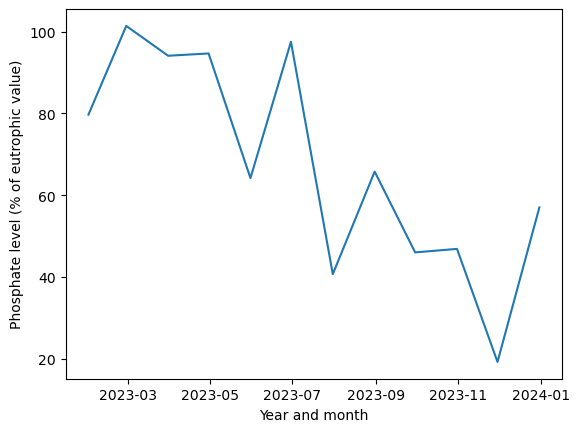

In [4]:
np.random.seed(1)
time_series_2 =  100 * (1 - (np.random.normal(size = numdates) / 8 + np.arange(numdates) / 16))
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')
ax = sns.lineplot(x = datearray, y = time_series_2)
ax.set_xlabel("Year and month")
ax.set_ylabel("Phosphate level (% of eutrophic value)")

<Axes: >

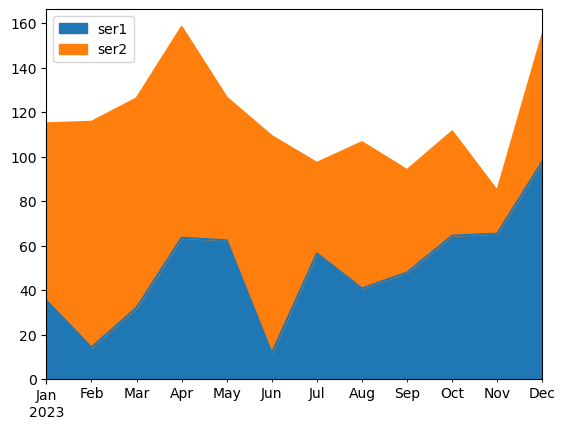

In [5]:
df = pd.DataFrame({'ser1': time_series, 'ser2': time_series_2}, index = datearray)
df.plot.area()

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do:

- Find correlations between pairs of variables.

- Draw scatterplots, especially when the correlation is large.

- Draw pairplots.

- Draw line graphs and/or area graphs when there is date or time data together with numerical data.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If the data are not useable, find some new data!

- Do you see any outliers?  (Data points that are far from the rest of the data).

- Are any data items highly correlated with each other, suggesting that they are redundant?

- For the line plots, do you see a trend or pattern over time?  Does this suggest that the data are changing over time (drifting) in such a way as to invalidate comparisons?

- Can you think of any confounding variables?  (Third variables that could explain any correlations between other variables.  These third variables may or may not be reported in the dataset.)

Nuclear Energy Dataset Analyses

In [6]:
#Load the Dataset
import pandas as pd
import numpy as np

df = pd.read_csv("nuclear_energy_overview_eia.csv")

df.describe()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 7 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Year                                            614 non-null    int64  
 1   Month                                           614 non-null    object 
 2   Nuclear Generating Units, Total Operable Units  614 non-null    object 
 3   Nuclear Generating Units, Net Summer Capacity   614 non-null    float64
 4   Nuclear Electricity Net Generation              614 non-null    int64  
 5   Nuclear Share of Electricity Net Generation     614 non-null    float64
 6   Nuclear Generating Units, Capacity Factor       614 non-null    float64
dtypes: float64(3), int64(2), object(2)
memory usage: 33.7+ KB


In [7]:
#Clean/ Prepare Data - Convert Columns to Numeric; Force Errors to NaN

df.replace("Not Available", np.nan, inplace=True)

# Define Numeric AND Time Columns
numeric_cols = [
    "Nuclear Generating Units, Total Operable Units",
    "Nuclear Generating Units, Net Summer Capacity",
    "Nuclear Electricity Net Generation",
    "Nuclear Share of Electricity Net Generation",
    "Nuclear Generating Units, Capacity Factor"
]

# Convert to Numeric
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Drop Rows with Missing Data
df_clean = df[numeric_cols].dropna()


In [8]:
#Compute the Correlation Matrix

correlation_matrix = df[numeric_cols].corr()
print(correlation_matrix)

                                                Nuclear Generating Units, Total Operable Units  \
Nuclear Generating Units, Total Operable Units                                        1.000000   
Nuclear Generating Units, Net Summer Capacity                                         0.862375   
Nuclear Electricity Net Generation                                                    0.468487   
Nuclear Share of Electricity Net Generation                                           0.664391   
Nuclear Generating Units, Capacity Factor                                             0.148119   

                                                Nuclear Generating Units, Net Summer Capacity  \
Nuclear Generating Units, Total Operable Units                                       0.862375   
Nuclear Generating Units, Net Summer Capacity                                        1.000000   
Nuclear Electricity Net Generation                                                   0.908624   
Nuclear Share of Electr

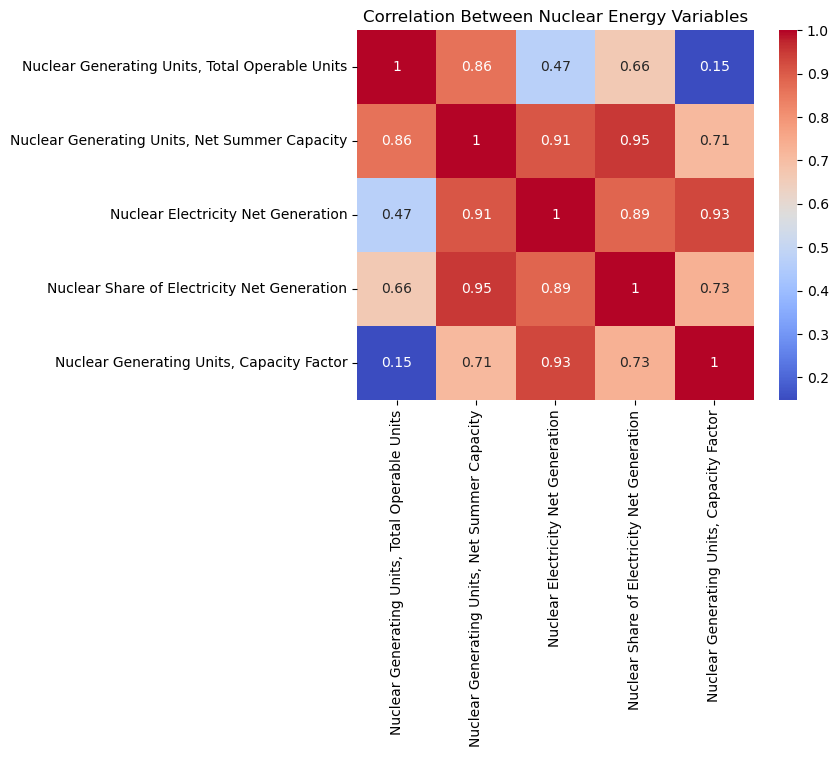

In [9]:
#Visualize the Correlations

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Between Nuclear Energy Variables")
plt.show()

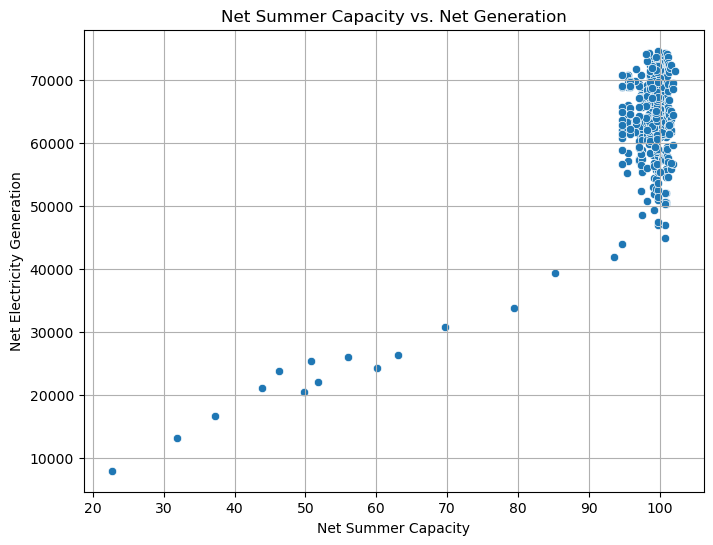

In [10]:
#Scatter Plot 1: Capacity vs.Net Generation

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_clean,
    x="Nuclear Generating Units, Net Summer Capacity",
    y="Nuclear Electricity Net Generation"
)
plt.title("Net Summer Capacity vs. Net Generation")
plt.xlabel("Net Summer Capacity")
plt.ylabel("Net Electricity Generation")
plt.grid(True)
plt.show()

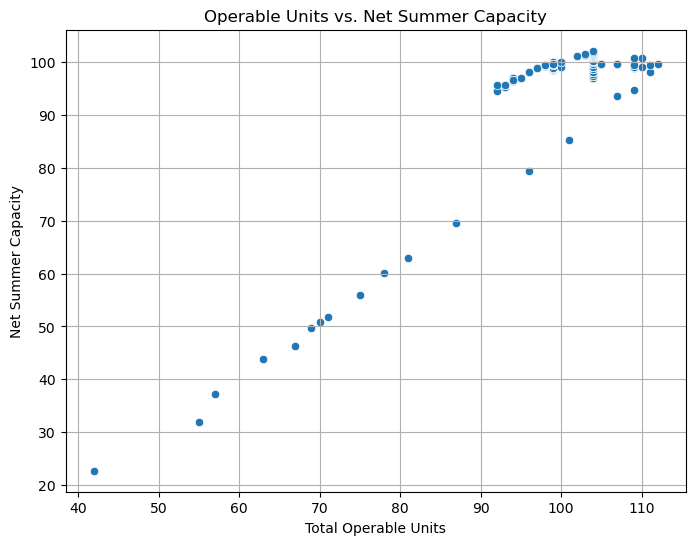

In [11]:
#Scatter Plot 2: Operable Units vs. Net Capacity 

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_clean,
    x="Nuclear Generating Units, Total Operable Units",
    y="Nuclear Generating Units, Net Summer Capacity"
)
plt.title("Operable Units vs. Net Summer Capacity")
plt.xlabel("Total Operable Units")
plt.ylabel("Net Summer Capacity")
plt.grid(True)
plt.show()

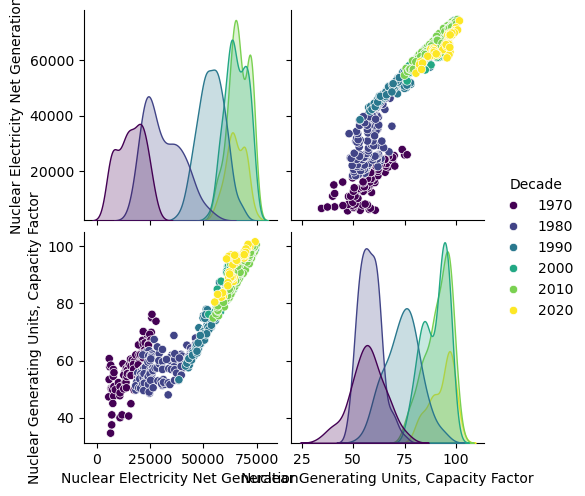

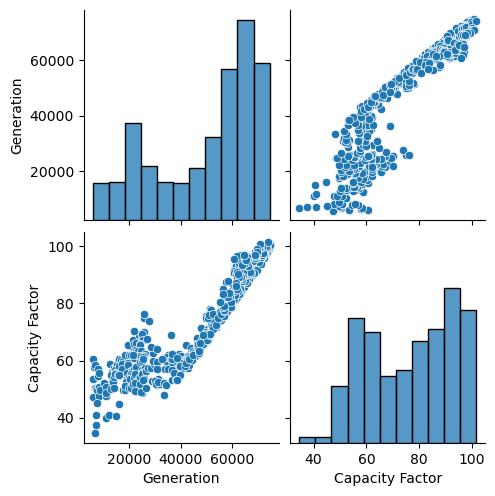

In [13]:
#Pair Plot of ALL Variables

df_renamed = df_clean.rename(columns={
    "Nuclear Generating Units, Total Operable Units": "Operable Units",
    "Nuclear Generating Units, Net Summer Capacity": "Capacity",
    "Nuclear Electricity Net Generation": "Generation",
    "Nuclear Share of Electricity Net Generation": "Share",
    "Nuclear Generating Units, Capacity Factor": "Capacity Factor"
})

df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df_clean['Decade'] = (df['Year'] // 10 * 10).astype(int)
sns.pairplot(df_clean, hue="Decade", palette="viridis")

sns.pairplot(df_renamed)

Analysis Conclusions: 1) There is a strong positive correlation between "Net Summer Capacity" and "Nuclear Electricity
                      Net Generation"; More capacity generally leads to more electricity output (as expected)
                      2) "Capacity Factor" has a strong positive correlation to "Nuclear Share of Electricity Net Generation"; When nuclear plants run close to full power, they have a greater influence on the national energy mix
                      3) There is a weak/ negative correlation between "Operable Units" and "Capacity Factor"; This means the number of reactors is not a good predictorof output or efficiency
                      4) Line plots across time show "Total Operable Units" increases then plateaus around 1990s
Potential Third Variables: Overall Electricity Demand; Energy Policy Shifts / Regulatory Events; Seasonal Energy Consumption Patterns; Fuel Costs / Natural Gas Prices; Plant Upgrades or Retirement (not directly visible in dataset)

# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 86-98 of the Storytelling With Data book as best you can.  (The second half of chapter three).  You do not have to get the exact data values right, just the overall look and feel.

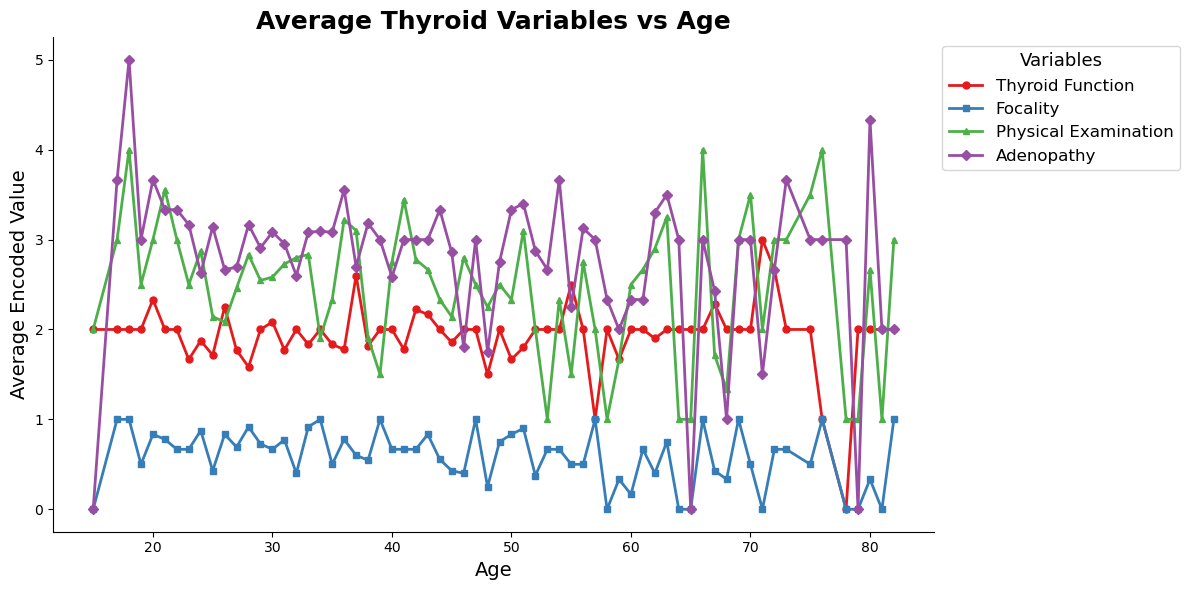

In [14]:
df_2 = pd.read_csv("Thyroid_Diff.csv")

#Ensure Age is Numeric
df_2['Age'] = pd.to_numeric(df_2['Age'], errors='coerce')

# Selected Columns to Plot
cols_to_plot = ["Thyroid Function", "Focality", "Physical Examination", "Adenopathy"]

# Convert Target Columns to Numeric Codes
for col in cols_to_plot:
    df_2[col] = df_2[col].astype('category').cat.codes

df2_clean = df_2.dropna(subset=['Age'] + cols_to_plot)

# Group by Age and Calculate Mean Values
age_grouped = df2_clean.groupby('Age')[cols_to_plot].mean().reset_index()

plt.figure(figsize=(12, 6))

colors = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3']
markers = ['o', 's', '^', 'D']

for i, col in enumerate(cols_to_plot):
    plt.plot(age_grouped['Age'], age_grouped[col], label=col, color=colors[i], marker=markers[i],
             linewidth=2, markersize=5)

plt.grid(False)
plt.title("Average Thyroid Variables vs Age", fontsize=18, fontweight='bold')
plt.xlabel("Age", fontsize=14)
plt.ylabel("Average Encoded Value", fontsize=14)
plt.legend(title='Variables', fontsize=12, title_fontsize=13, loc='upper left', bbox_to_anchor=(1, 1))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()